In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sys
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from statistics import mode
from scipy.stats import mode
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [34]:
def clustering_info(real, pred, k_arr):
    pred_clusters = np.zeros_like(pred)
    for i in range(len(k_arr)):
        mask = (pred == k_arr[i])
        pred_clusters[mask] = mode(real[mask])[0]

    print("accuracy:", metrics.fowlkes_mallows_score(real, pred_clusters))
    print("confusion matrix:")
    conf_data = confusion_matrix(real, pred_clusters, labels=k_arr)
    sns.heatmap(conf_data, cmap='Blues',annot=True, linewidths=0, fmt='g', xticklabels=k_arr, yticklabels=k_arr)
    plt.title('Red Wine Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [3]:
np.set_printoptions(threshold=sys.maxsize)
raw_red = pd.read_csv('winequality-red.csv', ";")

data_red = np.array(raw_red)
np.random.shuffle(data_red)

rows_red, cols_red = np.shape(data_red)
fit_len_red = (int)(rows_red * 0.8)
unique_red = sorted(list(dict.fromkeys(data_red[:,-1])), key = lambda x:float(x))
unique_red_len = len(unique_red)

trainX_red = data_red[:fit_len_red-1, :-1]
trainY_red = data_red[:fit_len_red-1, -1]
testX_red = data_red[fit_len_red:, :-1]
testY_red = data_red[fit_len_red:, -1]

C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\kaitl\anaconda3\lib\site-packages\pandas\plotting\_matpl

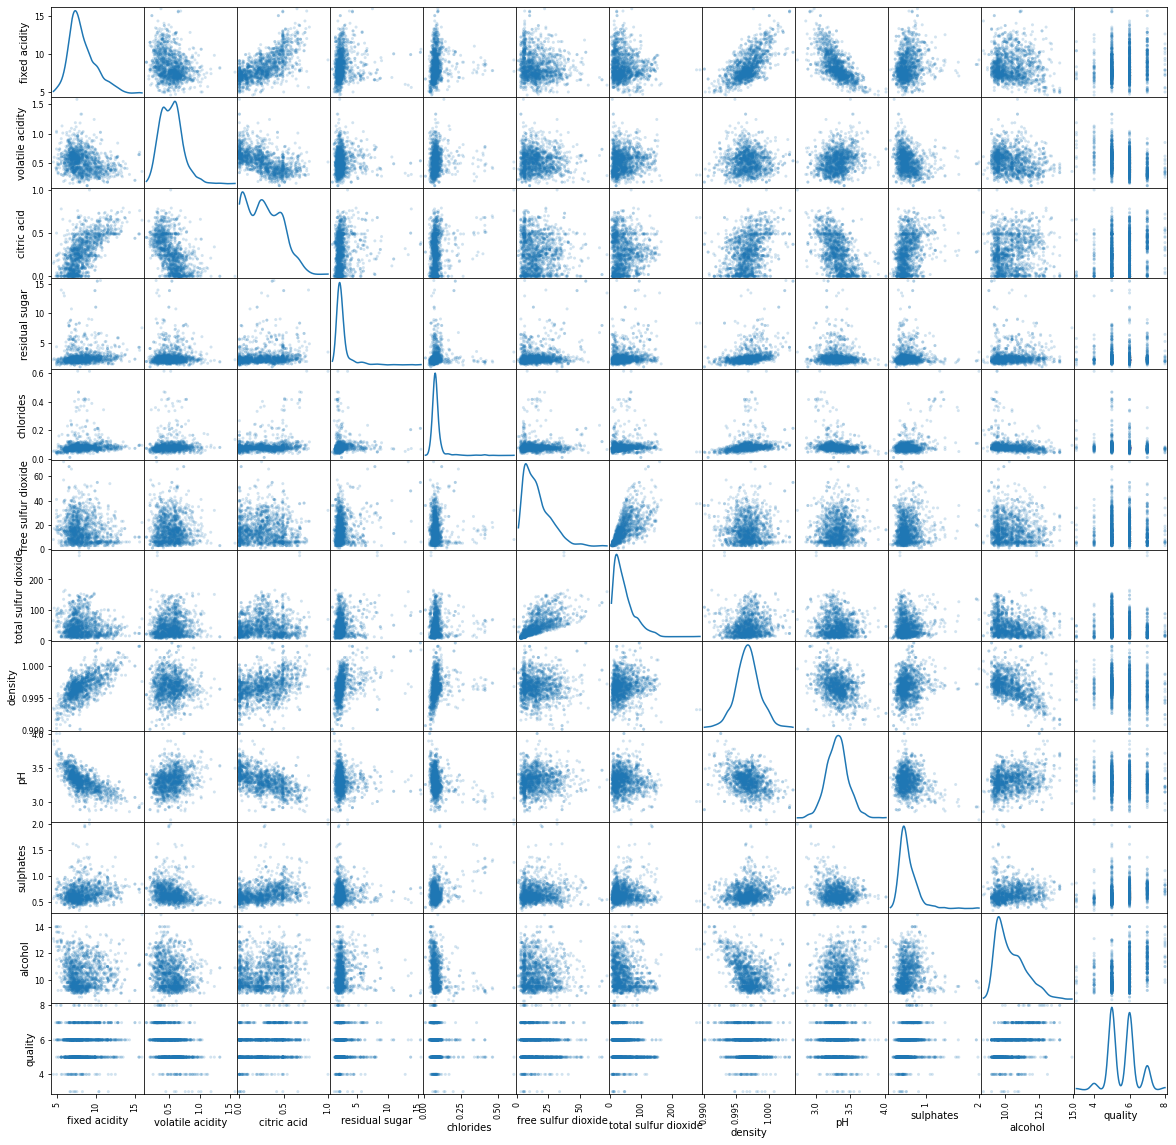

In [17]:
df = pd.DataFrame(data_red, columns=raw_red.columns)
graph = scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')



(1.0, 10.0)

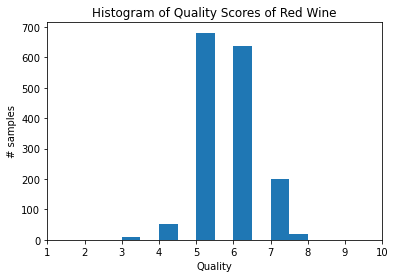

In [41]:
fig,ax=plt.subplots()
graph = plt.hist(data_red[:,-1])
plt.xlabel('Quality')
plt.ylabel('# samples')
plt.title('Histogram of Quality Scores of Red Wine')
plt.xlim((1,10))

K Means (sklearn k-means++)
accuracy: 0.4723012023906871
confusion matrix:


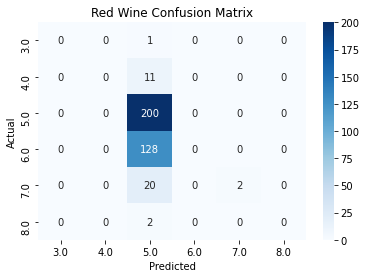

In [42]:
print ("K Means (sklearn k-means++)")
km = KMeans(init='k-means++', n_clusters=unique_red_len, n_init=20).fit_predict(data_red)
clustering_info(data_red[:,-1], km, unique_red)

Vector Machine (sklearn svc linear)
accuracy: 0.4922764036942857
confusion matrix:


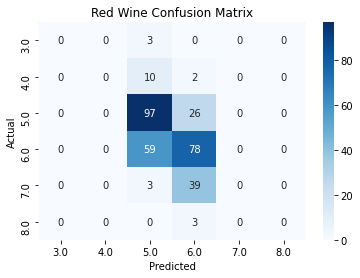

In [36]:
print("Vector Machine (sklearn svc linear)")
vml = make_pipeline(StandardScaler(), SVC(kernel='linear'))
vml.fit(trainX_red, trainY_red)
vmlY = vml.predict(testX_red)
clustering_info(testY_red, vmlY, unique_red)

intercept:  41.793735497989445
coefficients  [ 4.87260132e-02 -1.17486759e+00 -2.72589539e-01  2.78899078e-02
 -2.03756559e+00  3.93973403e-03 -2.99309175e-03 -3.79328468e+01
 -3.78009025e-01  1.02039391e+00  2.58181300e-01]
accuracy: 0.48506731161443906
confusion matrix:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     69.90
Date:                Thu, 10 Dec 2020   Prob (F-statistic):          3.37e-122
Time:                        17:08:10   Log-Likelihood:                -1229.4
No. Observations:                1278   AIC:                             2483.
Df Residuals:                    1266   BIC:                             2545.
Df Model:                          11                                         
Covariance Type:

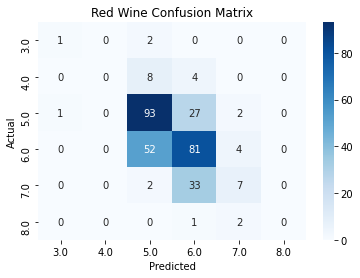

In [37]:
import statsmodels.api as sm
reg = LinearRegression().fit(trainX_red, trainY_red)
print("intercept: ", reg.intercept_)
print("coefficients ", reg.coef_)
regY = np.round(reg.predict(testX_red))
clustering_info(testY_red, regY, unique_red)

X = trainX_red
y = trainY_red
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

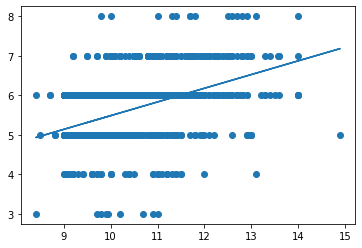

In [18]:
plt.scatter(trainX_red[:,10], trainY_red)
m, b = np.polyfit(trainX_red[:,10], trainY_red, 1)
plt.plot(trainX_red[:,10], m * trainX_red[:,10] + b)